In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [52]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df=df.drop(["RowNumber",'CustomerId','Surname'],axis=1)

In [54]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [56]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


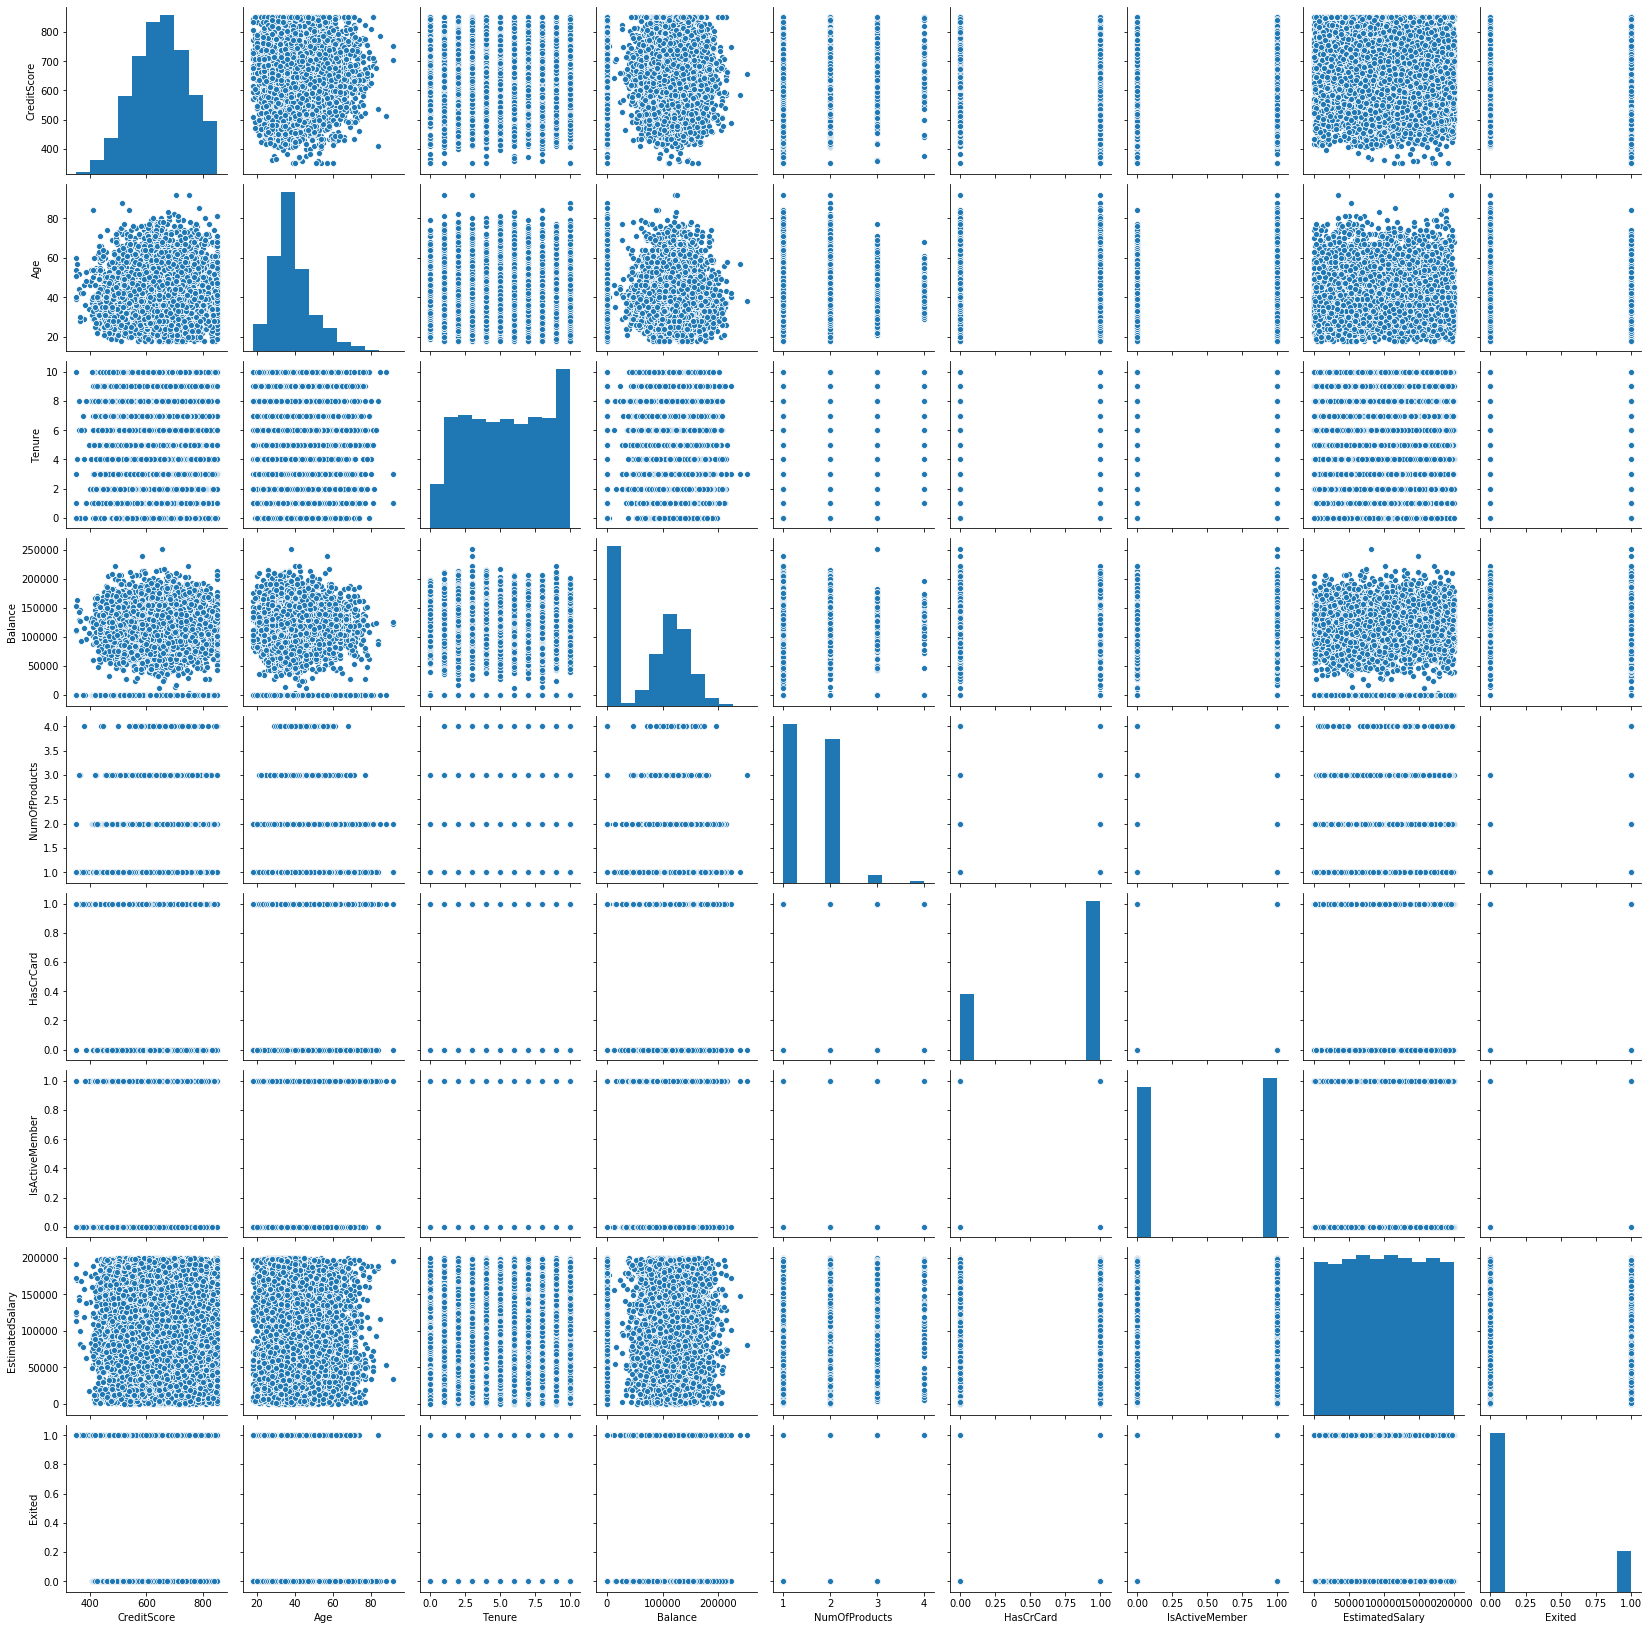

In [57]:
sns.pairplot(df)

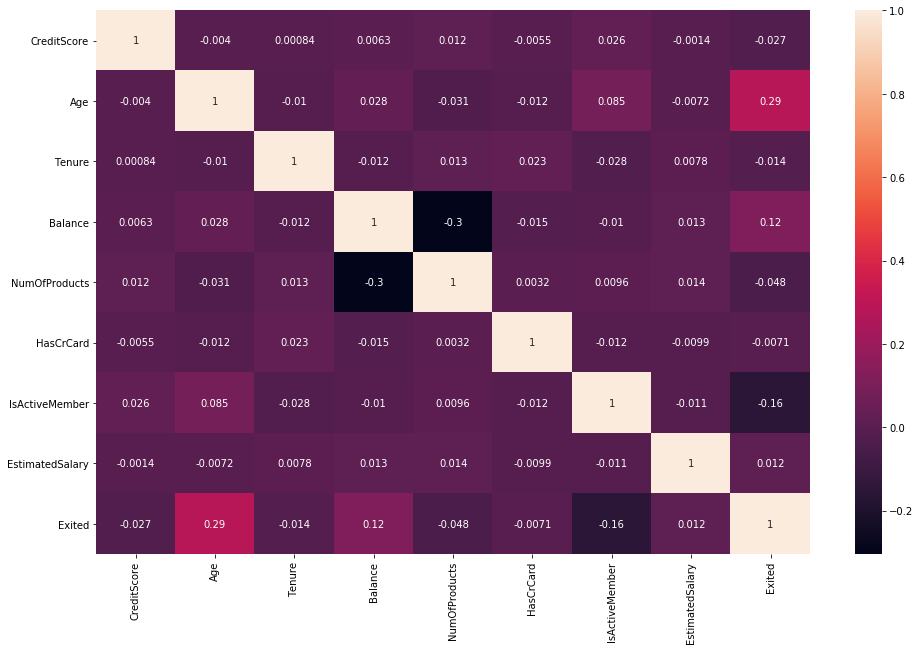

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [59]:
def plot(a):
    return plt.scatter(a,"Age",data=df)
    

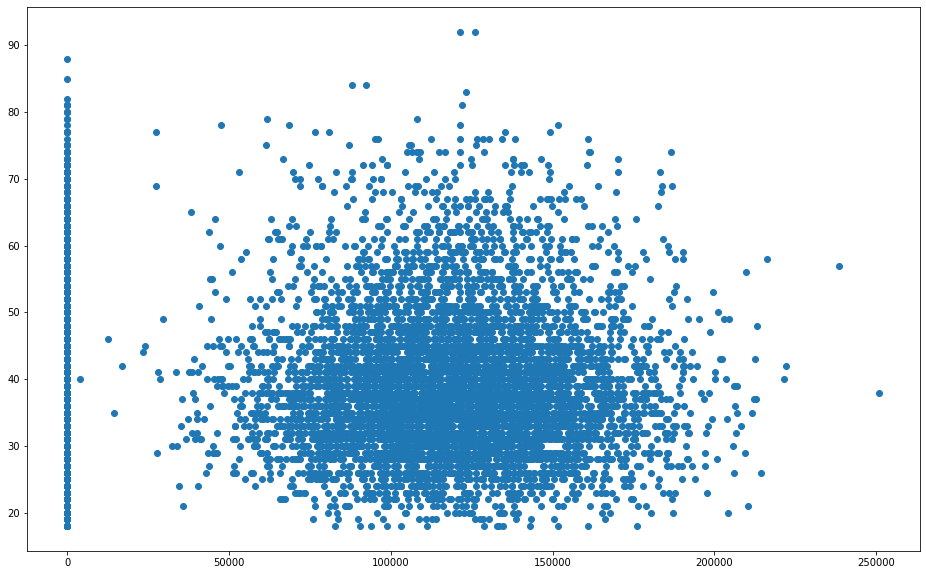

In [60]:
plt.figure(figsize=(16,10))
plot("Balance")

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [62]:
scaler=StandardScaler()

In [63]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.Gender=df.Gender.map({"Female":0,"Male":1})

In [65]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [66]:
cnt=pd.get_dummies(df.Geography,drop_first=True)

In [67]:
cnt.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [68]:
df=pd.concat([df,cnt],axis=1)

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [70]:
df=df.drop("Geography",axis=1)

In [71]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [72]:
num_vars=['CreditScore','Age',"Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [73]:
df[num_vars]=scaler.fit_transform(df[num_vars])

In [74]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [75]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
1191,-0.119286,1,-1.136786,-0.695982,1.190973,-0.911583,0,1,-0.258771,0,1,0
4458,-0.181367,1,-0.183251,-1.041760,-1.225848,0.807737,1,0,1.428818,0,0,0
1131,-1.557488,1,-0.183251,1.378686,0.790719,-0.911583,1,0,0.201847,0,0,1
9562,0.905045,1,0.007457,-0.004426,-1.225848,0.807737,1,1,0.248641,0,0,0
6579,-1.598875,0,-0.278604,0.687130,-1.225848,0.807737,0,0,0.139252,0,0,0


In [76]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
1191,-0.119286,1,-1.136786,-0.695982,1.190973,-0.911583,0,1,-0.258771,0,1,0
4458,-0.181367,1,-0.183251,-1.041760,-1.225848,0.807737,1,0,1.428818,0,0,0
1131,-1.557488,1,-0.183251,1.378686,0.790719,-0.911583,1,0,0.201847,0,0,1
9562,0.905045,1,0.007457,-0.004426,-1.225848,0.807737,1,1,0.248641,0,0,0
6579,-1.598875,0,-0.278604,0.687130,-1.225848,0.807737,0,0,0.139252,0,0,0


In [77]:
df_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,-0.005631,0.545571,0.004542,-0.000721,0.003604,-0.005256,0.703429,0.511286,0.002757,0.201857,0.254429,0.247714
std,0.992942,0.497954,1.003503,0.999980,1.000672,0.996439,0.456779,0.499908,0.992623,0.401415,0.435571,0.431716
min,-3.099157,0.000000,-1.994969,-1.733315,-1.225848,-0.911583,0.000000,0.000000,-1.740268,0.000000,0.000000,0.000000
25%,-0.698705,0.000000,-0.660018,-1.041760,-1.225848,-0.911583,0.000000,0.000000,-0.841539,0.000000,0.000000,0.000000
50%,0.004875,1.000000,-0.183251,-0.004426,0.328655,-0.911583,1.000000,1.000000,0.001652,0.000000,0.000000,0.000000
75%,0.677416,1.000000,0.484225,0.687130,0.821753,0.807737,1.000000,1.000000,0.850173,0.000000,1.000000,0.000000
max,2.063884,1.000000,5.061197,1.724464,2.594816,4.246377,1.000000,1.000000,1.736822,1.000000,1.000000,1.000000


In [78]:
y_train = df_train.pop('Exited')
X_train = df_train

In [79]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
1191,-0.119286,1,-1.136786,-0.695982,1.190973,-0.911583,0,1,-0.258771,1,0
4458,-0.181367,1,-0.183251,-1.041760,-1.225848,0.807737,1,0,1.428818,0,0
1131,-1.557488,1,-0.183251,1.378686,0.790719,-0.911583,1,0,0.201847,0,1
9562,0.905045,1,0.007457,-0.004426,-1.225848,0.807737,1,1,0.248641,0,0
6579,-1.598875,0,-0.278604,0.687130,-1.225848,0.807737,0,0,0.139252,0,0


In [80]:
y_train.head()

1191    0
4458    0
1131    0
9562    0
6579    0
Name: Exited, dtype: int64

In [81]:
import keras


In [82]:
from keras.models import Sequential
from keras.layers import Dense

In [83]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [95]:
def build(optimizer):
    keras=Sequential()
    keras.add(Dense(units=7,activation='relu',kernel_initializer="uniform",input_dim=11))
    keras.add(Dense(units=7,activation='relu',kernel_initializer="uniform",input_dim=11))
    keras.add(Dense(units=1,activation='sigmoid',kernel_initializer="uniform",input_dim=11))
    keras.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return keras

In [96]:
keras=KerasClassifier(build_fn=build)

In [97]:
params={'batch_size':[25,35],'epochs':[100,400],'optimizer':['adam','rmsprop']}
model_cv=GridSearchCV(estimator=keras,param_grid=params,scoring='accuracy',n_jobs=-1,cv=10)

In [98]:
model=model_cv.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
7000/7000 [==============================] - 3s 372us/step - loss: 0.5377 - accuracy: 0.7980
Epoch 2/100
7000/7000 [==============================] - 1s 74us/step - loss: 0.4367 - accuracy: 0.7981
Epoch 3/100
7000/7000 [==============================] - 0s 68us/step - loss: 0.4299 - accuracy: 0.7981
Epoch 4/100
7000/7000 [==============================] - 0s 68us/step - loss: 0.4278 - accuracy: 0.7981
Epoch 5/100
7000/7000 [==============================] - 0s 70us/step - loss: 0.4267 - accuracy: 0.7981
Epoch 6/100
7000/7000 [==============================] - 0s 65us/step - loss: 0.4260 - accuracy: 0.7981
Epoch 7/100
7000/7000 [==============================] - 0s 62us/step - loss: 0.4253 - accuracy: 0.7979
Epoch 8/100
7000/7000 [==============================] - 0s 67us/step - loss: 0.4231 - accuracy: 0.8139
Epoch 9/100
7000/7000 [==============================] - 0s 62us/step - 

7000/7000 [==============================] - 0s 58us/step - loss: 0.3372 - accuracy: 0.8587
Epoch 74/100
7000/7000 [==============================] - 0s 60us/step - loss: 0.3379 - accuracy: 0.8600
Epoch 75/100
7000/7000 [==============================] - 0s 57us/step - loss: 0.3377 - accuracy: 0.8586
Epoch 76/100
7000/7000 [==============================] - 0s 57us/step - loss: 0.3381 - accuracy: 0.8591
Epoch 77/100
7000/7000 [==============================] - 0s 63us/step - loss: 0.3368 - accuracy: 0.8609
Epoch 78/100
7000/7000 [==============================] - 0s 57us/step - loss: 0.3367 - accuracy: 0.8597
Epoch 79/100
7000/7000 [==============================] - 0s 60us/step - loss: 0.3363 - accuracy: 0.8603
Epoch 80/100
7000/7000 [==============================] - 0s 60us/step - loss: 0.3375 - accuracy: 0.8599
Epoch 81/100
7000/7000 [==============================] - 0s 63us/step - loss: 0.3366 - accuracy: 0.8564
Epoch 82/100
7000/7000 [==============================] - 1s 77us/st

In [99]:
best_parameters = model.best_params_
best_accuracy = model.best_score_

In [100]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}

In [101]:
best_accuracy

0.8587142857142858

In [102]:
model=pd.DataFrame(model.cv_results_)
model.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_optimizer,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,70.266107,5.308355,0.300265,0.135644,25,100,adam,"{'batch_size': 25, 'epochs': 100, 'optimizer':...",0.857143,0.858571,...,0.864286,0.861429,0.858571,0.827143,0.864286,0.862857,0.861429,0.858714,0.011202,1
1,60.488147,0.661058,0.290462,0.026282,25,100,rmsprop,"{'batch_size': 25, 'epochs': 100, 'optimizer':...",0.838571,0.834286,...,0.840000,0.842857,0.865714,0.852857,0.844286,0.861429,0.817143,0.844571,0.013168,8
2,270.198585,4.399446,0.409470,0.039541,25,400,adam,"{'batch_size': 25, 'epochs': 400, 'optimizer':...",0.847143,0.838571,...,0.831429,0.862857,0.858571,0.844286,0.872857,0.857143,0.825714,0.851286,0.015785,2
3,248.235849,12.317827,0.442823,0.137921,25,400,rmsprop,"{'batch_size': 25, 'epochs': 400, 'optimizer':...",0.850000,0.857143,...,0.857143,0.864286,0.851429,0.825714,0.858571,0.857143,0.822857,0.851286,0.014448,3
4,42.041138,0.398240,0.122608,0.038576,35,100,adam,"{'batch_size': 35, 'epochs': 100, 'optimizer':...",0.814286,0.867143,...,0.872857,0.850000,0.834286,0.844286,0.868571,0.842857,0.827143,0.849571,0.019692,4


In [103]:
model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_optimizer,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,70.266107,5.308355,0.300265,0.135644,25,100,adam,"{'batch_size': 25, 'epochs': 100, 'optimizer':...",0.857143,0.858571,...,0.864286,0.861429,0.858571,0.827143,0.864286,0.862857,0.861429,0.858714,0.011202,1
1,60.488147,0.661058,0.290462,0.026282,25,100,rmsprop,"{'batch_size': 25, 'epochs': 100, 'optimizer':...",0.838571,0.834286,...,0.840000,0.842857,0.865714,0.852857,0.844286,0.861429,0.817143,0.844571,0.013168,8
2,270.198585,4.399446,0.409470,0.039541,25,400,adam,"{'batch_size': 25, 'epochs': 400, 'optimizer':...",0.847143,0.838571,...,0.831429,0.862857,0.858571,0.844286,0.872857,0.857143,0.825714,0.851286,0.015785,2
3,248.235849,12.317827,0.442823,0.137921,25,400,rmsprop,"{'batch_size': 25, 'epochs': 400, 'optimizer':...",0.850000,0.857143,...,0.857143,0.864286,0.851429,0.825714,0.858571,0.857143,0.822857,0.851286,0.014448,3
4,42.041138,0.398240,0.122608,0.038576,35,100,adam,"{'batch_size': 35, 'epochs': 100, 'optimizer':...",0.814286,0.867143,...,0.872857,0.850000,0.834286,0.844286,0.868571,0.842857,0.827143,0.849571,0.019692,4
5,39.955446,0.554580,0.203644,0.031911,35,100,rmsprop,"{'batch_size': 35, 'epochs': 100, 'optimizer':...",0.834286,0.837143,...,0.868571,0.841429,0.858571,0.825714,0.838571,0.858571,0.821429,0.845429,0.016448,7
6,173.743498,2.354149,0.309924,0.038550,35,400,adam,"{'batch_size': 35, 'epochs': 400, 'optimizer':...",0.855714,0.852857,...,0.835714,0.847143,0.857143,0.847143,0.861429,0.857143,0.824286,0.848714,0.010680,6
7,165.247535,6.437652,0.359644,0.098227,35,400,rmsprop,"{'batch_size': 35, 'epochs': 400, 'optimizer':...",0.831429,0.837143,...,0.834286,0.838571,0.861429,0.854286,0.867143,0.845714,0.847143,0.848714,0.013193,5


In [104]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      8 non-null      float64
 1   std_fit_time       8 non-null      float64
 2   mean_score_time    8 non-null      float64
 3   std_score_time     8 non-null      float64
 4   param_batch_size   8 non-null      object 
 5   param_epochs       8 non-null      object 
 6   param_optimizer    8 non-null      object 
 7   params             8 non-null      object 
 8   split0_test_score  8 non-null      float64
 9   split1_test_score  8 non-null      float64
 10  split2_test_score  8 non-null      float64
 11  split3_test_score  8 non-null      float64
 12  split4_test_score  8 non-null      float64
 13  split5_test_score  8 non-null      float64
 14  split6_test_score  8 non-null      float64
 15  split7_test_score  8 non-null      float64
 16  split8_test_score  8 non-null 

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["params"], cv_results["mean_test_score"])
plt.plot(cv_results["params"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')